In [ ]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

device="cuda" if(torch.cuda.is_available()) else "cpu"

In [ ]:
N_CLASSES=4
N_FEATURES=2
RANDOM_SEED=42

x_blob,y_blob=make_blobs(n_samples=1000,n_features=N_FEATURES,centers=N_CLASSES,random_state=RANDOM_SEED,cluster_std=1.5)
print(f"x variable : \n{x_blob[:5]} \n \n|  y variable : \n{y_blob[:5]}")
print(f"\n\n x shape : {x_blob.shape} | y shape {y_blob.shape}")
print(f" x type : {type(x_blob)} | y type : {type(y_blob)}")

x variable : 
[[-8.41339595  6.93516545]
 [-5.76648413 -6.43117072]
 [-6.04213682 -6.76610151]
 [ 3.95083749  0.69840313]
 [ 4.25049181 -0.28154475]] 
 
|  y variable : 
[3 2 2 1 1]


 x shape : (1000, 2) | y shape (1000,)
 x type : <class 'numpy.ndarray'> | y type : <class 'numpy.ndarray'>


In [ ]:
print(f"{type(x_blob)} , { type(y_blob)}\n\n")

x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

x_train,x_test,y_train,y_test=train_test_split(x_blob,y_blob,test_size=0.2,random_state=42)

print(f"training x set :\n {x_train[:5,]}\n \n y set : \n {y_train[:5]} ")

<class 'numpy.ndarray'> , <class 'numpy.ndarray'>


training x set :
 tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260],
        [-8.5240, -9.0402],
        [-6.0262, -4.4375],
        [-3.3397,  7.2175]])
 
 y set : 
 tensor([1, 0, 2, 2, 0]) 


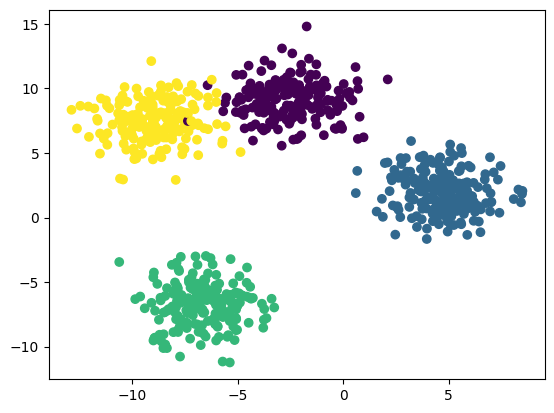

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

In [ ]:
class blob_model(nn.Module):
  def __init__(self,input_features,output_features,hidden_feature):
    super().__init__()
    self.linear_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_feature),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feature,out_features=hidden_feature),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feature,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_stack(x)

In [ ]:
model_0=blob_model(input_features=2,output_features=4,hidden_feature=8)
model_0.to(device)

blob_model(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
type(x_train),type(x_test),type(y_train),type(y_test)

(torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor)

In [ ]:
torch.unique(y_train)

tensor([0, 1, 2, 3])

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
y_test[:5]

tensor([1, 3, 2, 1, 0])

In [ ]:
def accuracy_fn(y_true,y_pred):
 # print(f"{len(y_train.to(device))}      ,      {len(torch.argmax(torch.softmax(model_0(x_train.to(device)),dim=1),dim=1))}")
  acc=torch.sum(torch.eq(y_true,y_pred))
  per=(acc/len(y_true))*100
  return per



In [ ]:
x_train[:5]
n=model_0(x_train.to(device))

In [ ]:
z=(torch.softmax(model_0(x_train[:5].to(device)),dim=1))
z=torch.argmax(z,dim=1)  # we need to put the dimention
z

tensor([1, 0, 0, 0, 0])

In [ ]:
len(y_train.to(device)),len(torch.argmax(torch.softmax(model_0(x_train.to(device)),dim=1),dim=1))


(800, 800)

In [ ]:
acc=accuracy_fn(y_train.to(device),torch.argmax(torch.softmax(model_0(x_train.to(device)),dim=1),dim=1))
print(acc)

tensor(40.3750)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)


epochs=200

for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(x_train)
  #print(f"{y_logits.dtype}|{y_train.dtype}")
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logit=model_0(x_test)
    test_prob=torch.softmax(test_logit,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logit,y_test)
    test_acc=accuracy_fn(y_test,test_prob)

  if(epoch%10==0):
    print(f"number of epoch : {epoch}  |  train loss : {loss}  |   train accuracy : {acc}  |  test loss : {test_loss}  |  test accuracy : {test_acc}")



number of epoch : 0  |  train loss : 1.1588267087936401  |   train accuracy : 40.375  |  test loss : 1.0755422115325928  |  test accuracy : 48.0
number of epoch : 10  |  train loss : 0.6447553038597107  |   train accuracy : 96.75  |  test loss : 0.660687267780304  |  test accuracy : 97.5
number of epoch : 20  |  train loss : 0.4253515303134918  |   train accuracy : 98.5  |  test loss : 0.43074119091033936  |  test accuracy : 100.0
number of epoch : 30  |  train loss : 0.2529422640800476  |   train accuracy : 99.125  |  test loss : 0.24507610499858856  |  test accuracy : 99.5
number of epoch : 40  |  train loss : 0.11232147365808487  |   train accuracy : 99.25  |  test loss : 0.10228512436151505  |  test accuracy : 99.5
number of epoch : 50  |  train loss : 0.06626509130001068  |   train accuracy : 99.25  |  test loss : 0.058475371450185776  |  test accuracy : 99.5
number of epoch : 60  |  train loss : 0.05068016052246094  |   train accuracy : 99.25  |  test loss : 0.042932283133268356 

In [ ]:
import requests
from pathlib import Path
path=Path("/content/helper_function.py")
if(path.exists()):
  print("the file exists")
else:
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

the file exists


In [ ]:
from helper_function import plot_decision_boundary

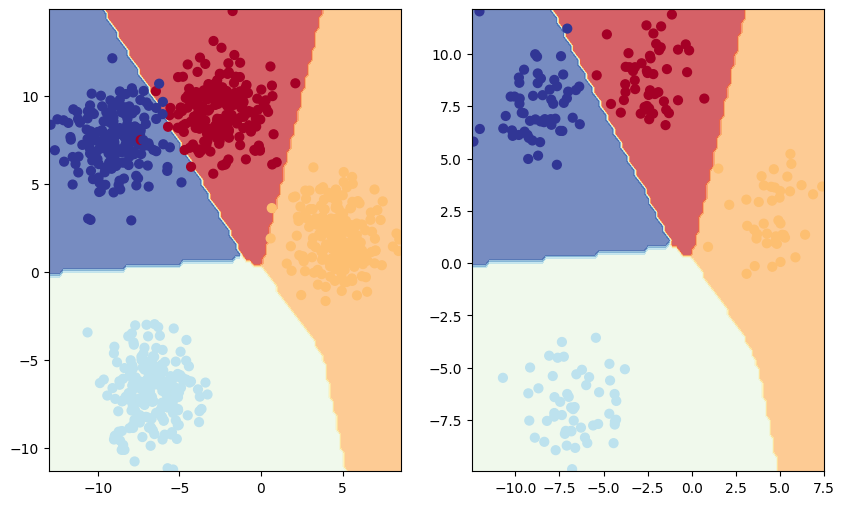

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_0,x_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_0,x_test,y_test)

In [ ]:
!pip install torchmetrics==0.9.3

In [ ]:
from torchmetrics import Accuracy
acc=Accuracy(task="multiclass",num_classes=4)
acc(y_pred,y_train)

tensor(0.9925)